# 生成数据

## 绘制简单折线图

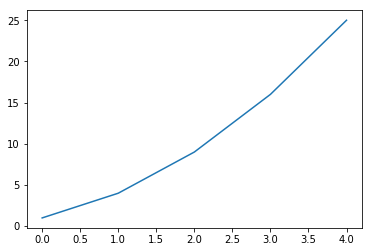

In [6]:
%matplotlib inline
# 以上命令让软件在这里画图
import matplotlib.pyplot as plt

squares = [1, 4, 9, 16, 25] # 尝试将数字变成有意义的图形
plt.plot(squares)

### 修改文字标签和线条粗细

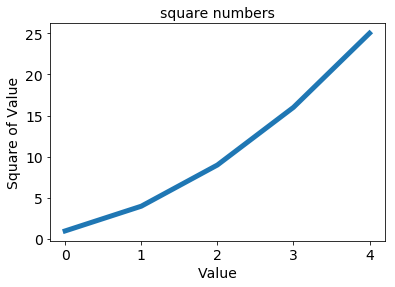

In [10]:
import matplotlib.pyplot as plt # pyplot 包含许多生成图表的函数


squares = [1,4,9,16,25] # 不指定坐标时，第一个数字对应0

plt.plot(squares, linewidth=5) # 尝试根据数字绘制有意义的图形 
# 不给初始值,假设为0

# 设置图表标题，并给坐标轴加上标签
plt.title('square numbers',fontsize=14)
plt.xlabel('Value',fontsize=14)
plt.ylabel('Square of Value',fontsize=14) # xlabel,ylabel 决定线条的粗细

# 设置刻度标记的大小
plt.tick_params(axis='both',labelsize=14) # axis='both'指定实参影响x，y轴的刻度
                                           # 刻度标记字号为14

Text(0.5, 1.0, '$x^2$')

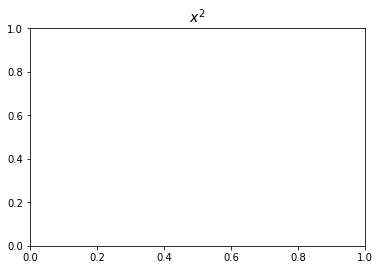

In [9]:
# 可以加两个$$使用latex公式
plt.title('$x^2$',fontsize=14)

### 矫正图形

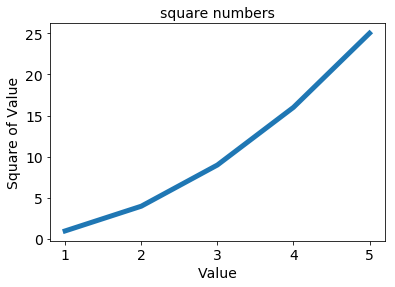

In [12]:
import matplotlib.pyplot as plt # pyplot 包含许多生成图表的函数

input_values = [1,2,3,4,5]
squares = [1,4,9,16,25] # 不指定坐标时，第一个数字对应0

plt.plot(input_values,squares, linewidth=5) # 尝试根据数字绘制有意义的图形

# 设置图表标题，并给坐标轴加上标签
plt.title('square numbers',fontsize=14)
plt.xlabel('Value',fontsize=14)
plt.ylabel('Square of Value',fontsize=14) # xlabel,ylabel 决定线条的粗细

# 设置刻度标记的大小
plt.tick_params(axis='both',labelsize=14) # axis='both'指定实参影响x，y轴的刻度
                                           # 刻度标记字号为14

plt.show() # 打开查看器，绘制图像

### 使用scatter()并设置样式

'\nplt.savvefig可以保存图表，第一个形参指定文件名\n第二个形参表示将空白区域裁掉\n'

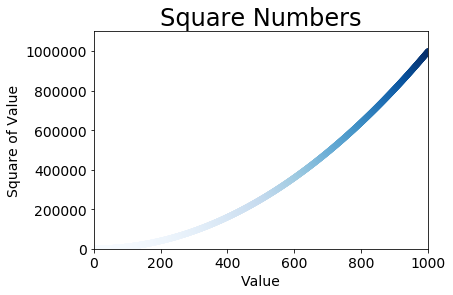

In [2]:
import matplotlib.pyplot as plt

x = list(range(1,1001))  # 创建1<= x <=1000 的列表
y = [x ** 2 for x in x]

plt.scatter(x,y,edgecolor='none',c=y,cmap=plt.cm.Blues,s=40) # 实参s设置了点的尺寸
'''
默认为蓝色点黑色轮廓，绘制很多点时，黑色轮廓黏在一起，
可传递实参edgecolor='none'
c可设置颜色名称，如c=‘red’也可自定义颜色，包含3个0~1的小数值
值接近0，颜色越深，淡蓝色为c=(0,0,0.8)

颜色映射（colormap）从起始颜色渐变到结束颜色
以上代码让数值小的表示浅蓝色，y值大为深蓝色
'''

# 设置图标并给坐标轴加标签
plt.title('Square Numbers',fontsize=24)
plt.xlabel('Value',fontsize=14)
plt.ylabel('Square of Value',fontsize=14)

# 设置刻度标记大小
plt.tick_params(axis='both',which='major',labelsize=14)

# 设置每个坐标轴的取值范围
plt.axis([0,1000,0,1100000])
'''
x轴范围是[0,1100]
y轴范围是[0,1100000]
'''
#plt.show()

plt.savefig('text_files/squares_plot.png',bbox_inches='tight')
'''
plt.savvefig可以保存图表，第一个形参指定文件名
第二个形参表示将空白区域裁掉
'''

## 随机漫步

### 创建RandomWalk()类

In [7]:
from random import choice
'''
将所有可能选择放到列表中,在决策时可以选择使用那种选择
Signature: choice(seq)
Docstring: Choose a random element from a non-empty sequence.
File:      d:\anaconda\lib\random.py
Type:      method
'''

class RandomWalk():
    '''一个生成随机漫步数据的类'''
    
    def __init__(self, num_points=5000):# 将随机漫步初始值设为5000
        '''初始化自由漫步的属性'''
        self.num_points = num_points
        
        # 所有随机漫步始于(0,0)
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        '''计算随机漫步包含的的所有点'''
        
        # 不断漫步,直到列表达到指定长度
        while len(self.x_values) < self.num_points:
            # 决定前进方向及前进距离
            x_direction = choice([-1, 1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance

            y_direction = choice([-1,1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance

            # 拒绝原地踏步
            if x_step==0 and y_step == 0:
                continue

            # 计算下一个x,y值
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y)


### 绘制随机漫步

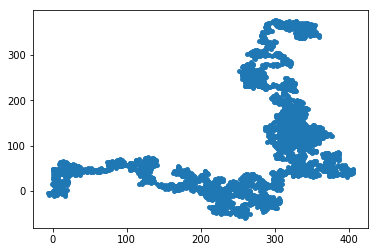

In [8]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()
plt.scatter(rw.x_values, rw.y_values,s=15)

### 给点着色

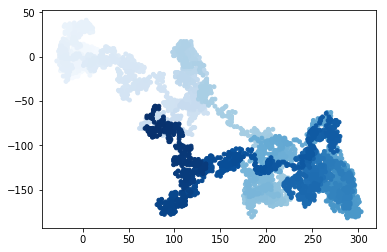

In [16]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()
############
point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
# plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
#            edgecolor='none',s=15)
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            s=15) # edgecolor='none'好像是默认的
#############

### 重新绘制起点终点

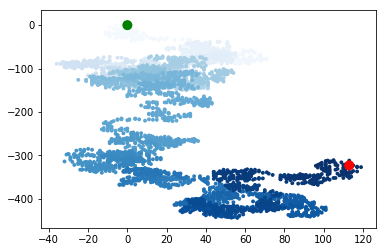

In [18]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()

point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            edgecolor='none',s=15)

##############
# 突出起点终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',s=100)

### 隐藏坐标轴

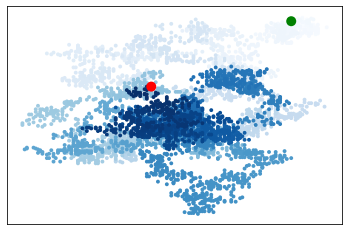

In [23]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()

point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            edgecolor='none',s=15)


# 突出起点终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',s=100)

# 隐藏坐标轴
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

### 增加点数

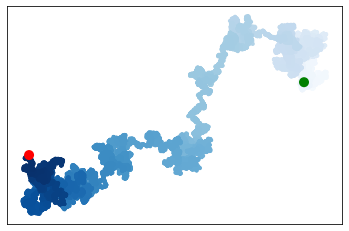

In [25]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入
###########
rw = RandomWalk(50000)
#########
rw.fill_walk()

point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            edgecolor='none',s=15)


# 突出起点终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',s=100)

# 隐藏坐标轴
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

### 调整尺寸来适应屏幕

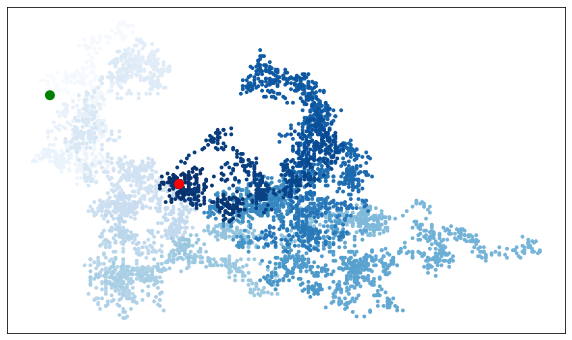

In [28]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()
############
# 设置绘图窗口尺寸
plt.figure(figsize=(10, 6))
###############3
point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            edgecolor='none',s=15)


# 突出起点终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',s=100)

# 隐藏坐标轴
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

## 使用pygal模拟掷骰子
- [pygal官方文档](http://www.pygal.org/en/stable/)

### 创建Die类

In [7]:
from random import randint

class Die():
    '''表示一个骰子的类'''
    
    def __init__(self, num_sides=6):
        '''骰子默认有6面'''
        self.num_sides = num_sides
    
    def roll(self):
        '''返回一个位于1和面数之间的随机数'''
        return randint(1,self.num_sides)
    

### 掷骰子

In [3]:
# from die import Die

# 创建一个骰子
die = Die()

# 掷骰子,存储在列表中
results = []
for roll_num in range(100):
    result = die.roll()
    results.append(result)

print(results)

[4, 4, 1, 5, 6, 1, 6, 4, 4, 1, 2, 1, 6, 5, 3, 4, 2, 5, 6, 3, 3, 6, 5, 5, 3, 5, 3, 1, 5, 2, 3, 2, 4, 4, 1, 3, 5, 6, 4, 3, 5, 4, 1, 4, 6, 5, 5, 2, 6, 6, 3, 4, 4, 4, 4, 4, 2, 2, 2, 6, 6, 4, 6, 5, 2, 5, 6, 1, 1, 1, 4, 2, 4, 6, 1, 4, 1, 1, 3, 3, 5, 6, 1, 5, 2, 2, 3, 1, 3, 3, 6, 1, 5, 6, 6, 1, 1, 5, 1, 2]


### 分析结果

In [4]:
# from die import Die

# 创建一个骰子
die = Die()

# 掷骰子,存储在列表中
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)

# 分析结果
frequencies = []
for value in range(1,die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
print(frequencies)

[191, 164, 160, 155, 166, 164]


### 绘制直方图

ModuleNotFoundError: No module named 'cairosvg'

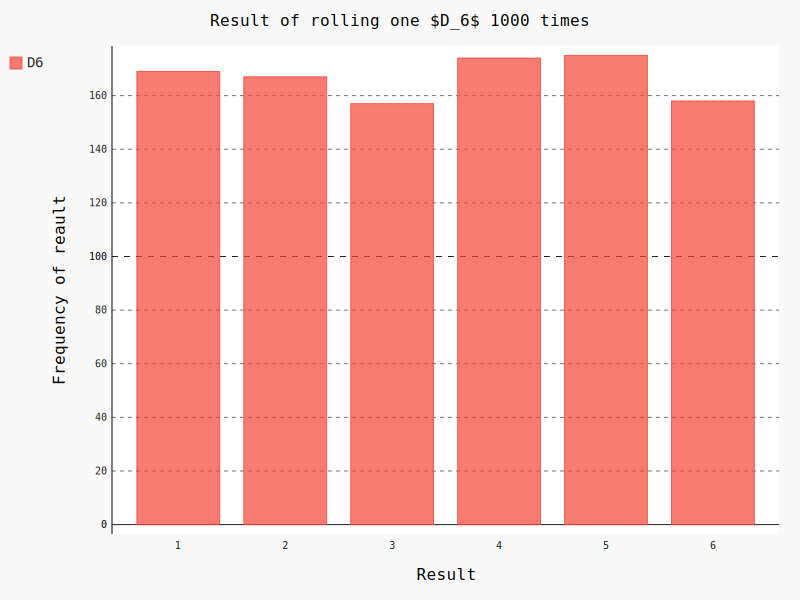

In [5]:
import pygal
# from die import Die

# 创建一个骰子
die = Die()

# 掷骰子,存储在列表中
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)

# 分析结果
frequencies = []
for value in range(1,die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
##################
# 对结果进行可视化
hist = pygal.Bar()

hist.title = 'Result of rolling one $D_6$ 1000 times'
hist.x_labels = ['1', '2','3', '4', '5','6']
hist.x_title = 'Result'
hist.y_title = 'Frequency of reault'

hist.add('D6', frequencies)
# hist.render_to_file('text_files/die_visual.svg')

### 同时掷两个骰子

ModuleNotFoundError: No module named 'cairosvg'

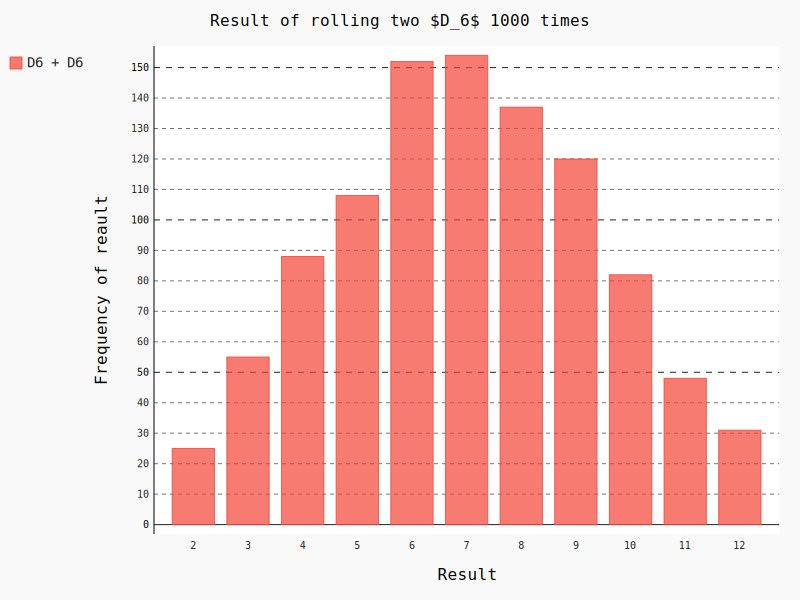

In [9]:
import pygal
# from die import Die

# 创建一个骰子
die_1 = Die()
die_2 = Die()

# 掷骰子,存储在列表中
results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll() ############
    results.append(result)

# 分析结果
frequencies = []
max_result = die_1.num_sides + die_2.num_sides ############
for value in range(2,max_result+1):#########
    frequency = results.count(value)
    frequencies.append(frequency)
    

# 对结果进行可视化
hist = pygal.Bar()

hist.title = 'Result of rolling two $D_6$ 1000 times'
hist.x_labels = [ '2','3', '4', '5','6','7','8','9','10','11','12']
hist.x_title = 'Result'
hist.y_title = 'Frequency of reault'

hist.add('D6 + D6', frequencies)
# hist.render_to_file('text_files/die_visual.svg')